In [1]:
import numpy as np

In [44]:
np.where

4.3

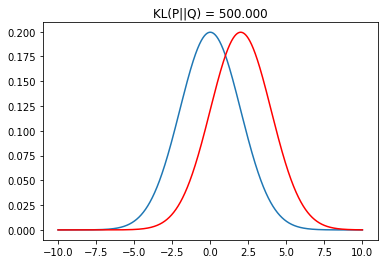

In [58]:
from scipy.stats import norm
import matplotlib.pyplot as plt

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')


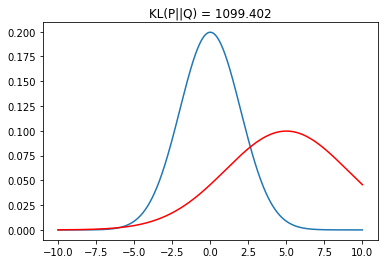

In [59]:
q = norm.pdf(x, 5, 4)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')

In [11]:
from sklearn import datasets, metrics
from active_semi_clustering.semi_supervised.pairwise_constraints import PCKMeans
from active_semi_clustering.active.pairwise_constraints import ExampleOracle, ExploreConsolidate, MinMax
X, y = datasets.load_iris(return_X_y=True)
# First, obtain some pairwise constraints from an oracle.

### TODO implement your own oracle that will, for example, query a domain expert via GUI or CLI
oracle = ExampleOracle(y, max_queries_cnt=10)

active_learner = MinMax(n_clusters=3)
active_learner.fit(X, oracle=oracle)
pairwise_constraints = active_learner.pairwise_constraints_
# Then, use the constraints to do the clustering.

clusterer = PCKMeans(n_clusters=3)
clusterer.fit(X, ml=pairwise_constraints[0], cl=pairwise_constraints[1])
# Evaluate the clustering using Adjusted Rand Score.

metrics.adjusted_rand_score(y, clusterer.labels_)

0.7163421126838475

In [15]:
len(y)

150

In [22]:
oracle

10